### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

<li>Independent Variable:
matching font color and word name or different.</li>
<li>Dependent Variable:
The duration of time that participant take to indicate the color.<li>

In [1]:
import  pandas as  pd
path  =  r'stroopdata.csv'
data = pd.read_csv(path)
data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The sample has n=24 with the recognition times of congruent and incongruent data. 
The null hypothesis is tested that the true mean difference is zero between the two data sets.

Null hypotheses (H_0): There is no difference in time needed to read a congruent displayed text to a incongruent displayed text.

Alternative hypotheses (H_A): It takes a different time to read an incongruent displayed text than to read a congruent displayed text.

$$ 
% 
\\ \mu_{congruent} -  \mu_{incongruent} = \mu_{difference}
% 
$$$$ 
% 
\\H_0: \mu_{difference} = 0
% 
$$$$ 
% 
\\H_A: \mu_{difference} \neq 0
% 
$$$$ 
% 
\\ \mu = population average
% 
$$$$ 
% 
\\ \overline{d} = sample average
% 
$$
t-test is performed because our sample size is smaller than 30 and the population standard deviation is unknown.
Two-tailed paired t-test performed, to test if there is a difference in the reaction time. 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

Measures of Central 

In [2]:
data['Congruent'].mean()

14.051124999999999

In [3]:
data['Congruent'].median()

14.3565

In [4]:
data['Congruent'].mode()

0      8.630
1      8.987
2      9.401
3      9.564
4     10.639
5     11.344
6     12.079
7     12.130
8     12.238
9     12.369
10    12.944
11    14.233
12    14.480
13    14.669
14    14.692
15    15.073
16    15.298
17    16.004
18    16.791
19    16.929
20    18.200
21    18.495
22    19.710
23    22.328
dtype: float64

In [5]:
data['Incongruent'].mean()

22.015916666666666

In [6]:
data['Incongruent'].median()

21.0175

In [7]:
data['Incongruent'].mode()

0     15.687
1     17.394
2     17.425
3     17.510
4     17.960
5     18.644
6     18.741
7     19.278
8     20.330
9     20.429
10    20.762
11    20.878
12    21.157
13    21.214
14    22.058
15    22.158
16    22.803
17    23.894
18    24.524
19    24.572
20    25.139
21    26.282
22    34.288
23    35.255
dtype: float64

Measures of variability

In [8]:
#calculate the standard deviation 
data.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

In [9]:
# calculate outlieres
# make a copy of original dataframe
newdata = data.copy()

newdata['CongruentDeviationFromMean'] = abs(newdata['Congruent'] - newdata['Congruent'].mean())
newdata['IsCongruentOutlier'] = abs(newdata['Congruent'] - newdata['Congruent'].mean()) > 1.96*newdata['Congruent'].std()
newdata['CongruentSquareDevation'] = abs(newdata['Congruent'] - newdata['Congruent'].mean())**2

newdata['IncongruentDeviationFromMean'] = abs(newdata['Incongruent'] - newdata['Incongruent'].mean())
newdata['IsIncongruentOutlier'] = abs(newdata['Incongruent'] - newdata['Incongruent'].mean()) > 1.96*newdata['Incongruent'].std()
newdata['IncongruentSquareDevation'] = abs(newdata['Incongruent'] - newdata['Incongruent'].mean())**2

newdata

,Congruent,Incongruent,CongruentDeviationFromMean,IsCongruentOutlier,CongruentSquareDevation,IncongruentDeviationFromMean,IsIncongruentOutlier,IncongruentSquareDevation
0,12.079,19.278,1.972125,False,3.889277,2.737917,False,7.496188
1,16.791,18.741,2.739875,False,7.506915,3.274917,False,10.725079
2,9.564,21.214,4.487125,False,20.134291,0.801917,False,0.643070
3,8.630,15.687,5.421125,False,29.388596,6.328917,False,40.055186
4,14.669,22.803,0.617875,False,0.381770,0.787083,False,0.619500
5,12.238,20.878,1.813125,False,3.287422,1.137917,False,1.294854
6,14.692,24.572,0.640875,False,0.410721,2.556083,False,6.533562
7,8.987,17.394,5.064125,False,25.645362,4.621917,False,21.362114
8,9.401,20.762,4.650125,False,21.623663,1.253917,False,1.572307
9,14.480,26.282,0.428875,False,0.183934,4.266083,False,18.199467


In [10]:
print(data.describe())

       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000


In [11]:
congruentvariance = ((newdata.CongruentSquareDevation).sum())/(newdata['Congruent'].count()-1)
congruentvariance

12.669029070652176

In [12]:
incongruentvariance = ((newdata.IncongruentSquareDevation).sum())/(newdata['Incongruent'].count()-1)
incongruentvariance

23.011757036231884

In [13]:
#calc IQR for Congruent Data
dfc = pd.DataFrame({'Congruent': data['Congruent']})
dfc.sort_values('Congruent', inplace=True)

Q1 = dfc['Congruent'].quantile(0.25)
Q3 = dfc['Congruent'].quantile(0.75)
IQR_Congruent = Q3 - Q1
print ("Congruent Data")
print ("Q1:", Q1)
print ("Q3:", Q3)
print ("IQR:", IQR_Congruent)
Outlier = Q1-(1.5*IQR_Congruent)
print (Outlier)
Outlierabove = Q3 + (1.5*IQR_Congruent)
print (Outlierabove)

Congruent Data
Q1: 11.89525
Q3: 16.20075
IQR: 4.3054999999999986
5.437000000000003
22.659


In [14]:
#calc IQR for Incongruent Data
dfi = pd.DataFrame({'Incongruent': data['Incongruent']})
dfi.sort_values('Incongruent', inplace=True)

Q1i = dfi['Incongruent'].quantile(0.25)
Q3i = dfi['Incongruent'].quantile(0.75)
IQR_Incongruent = Q3i - Q1i

print ("Incongruent Data")
print ("Q1:", Q1i)
print ("Q3:", Q3i)
print ("IQR:", IQR_Incongruent)
OutlierI = Q1i-(1.5*IQR_Incongruent)
print (OutlierI)
OutlieraboveI = Q3i+ (1.5*IQR_Incongruent)
print (OutlieraboveI)

Incongruent Data
Q1: 18.71675
Q3: 24.0515
IQR: 5.33475
10.714625000000002
32.053625


Standard Deviation

$$ % \sigma = \sqrt[]\frac{\sum (x_i - \overline{x})^2}{n-1} % $$$$
%
\sigma_{congruent} = 3.55
%
$$$$
%
\sigma_{incongruent} = 4.79
%
$$
Variance

$$
%
s^2 = \frac{\sum (x_i - \overline{x})^2}{n-1}
%
$$$$
%
s^2_{congruent} = 12.66
%
$$$$
%
s^2_{incongruent} = 23.01
%
$$
Range

The range including outliers shows that the quickest reader for incongruent data needed double the time as the quickest reader from the congruent data, in Congruent Data range start from 8.63 to 22.32 seconds, where as the Incroguent Data from 15.69 to 35.26.

Inter-quartile Range

 $$ 
% 
Q1 – 1.5 \dot IQR 
%
\
or 
\
%
Q3 + 1.5 \dot IQR
% 
$$

$$
%
IQR_{congruent} = 4.3055
%
$$
$$
%
IQR_{incongruent} = 5.3347
%
$$
50% of the congruent Data differ 4.3055 seconds and the lie between the marks Q1: 11.89525 and Q3: 16.20075. While the incongruent Data 50% differ 5.3347 seconds and the lie between the marks 18.71675 Q3: 24.0515. This shows that the incongruent data takes more time to read then the congruent data, because the 25% (Q1) and the 75%(Q3) are higher and the spread is also bigger.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Boxplots for Stroop Data')

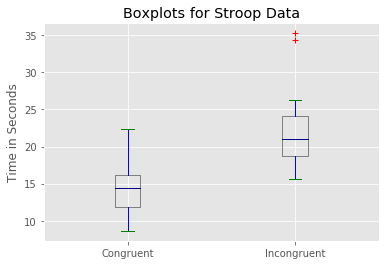

In [15]:
#visualizations
%pylab inline

import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

#boxplot
color = dict(boxes='grey', whiskers='blue', medians="DarkBlue", caps="green" )
data.plot.box(color=color, sym="r+");
ylabel('Time in Seconds')
title('Boxplots for Stroop Data')

The plot shows difference between the mean(Q2) of the congruent and the incongruent boxplots also Congruent Boxplot has no outliers, while the incongruent plot has two outliers at around 35 seconds. 

The congruent data plot is skewed slightly negatively, because the Mean (14.05) is smaller than the Median (14.36). The incongruent data plot is slightly skewed positively because the Median (21.02) is smaller than the Mean (22.02).



(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [16]:
# statistical test
from scipy import stats
stats.ttest_rel(a = data['Congruent'],
                b = data['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

paired t-test performed to show whether this difference is significant at a 95% confidence level.

Hypothesis $$ 
% 
\H&lt;em&gt;0: \mu&lt;/em&gt;{difference} = 0
\H&lt;em&gt;A: \mu&lt;/em&gt;{difference} \neq 0
% 
$$
$$
%
\mu_{congruent} = 14.05 \\
\mu_{incongruent} = 22.02 \\
\mu_{difference} = -7.96 \\
n = 24 \\
df = 23\\
%
$$

In [17]:
#calc difference between two tables
ttestdata = data.copy()
M_D = -7.96
n = 24
df = 23
ttestdata['Difference'] = abs(ttestdata['Congruent'] - ttestdata['Incongruent'])

print (ttestdata)

    Congruent  Incongruent  Difference
0      12.079       19.278       7.199
1      16.791       18.741       1.950
2       9.564       21.214      11.650
3       8.630       15.687       7.057
4      14.669       22.803       8.134
5      12.238       20.878       8.640
6      14.692       24.572       9.880
7       8.987       17.394       8.407
8       9.401       20.762      11.361
9      14.480       26.282      11.802
10     22.328       24.524       2.196
11     15.298       18.644       3.346
12     15.073       17.510       2.437
13     16.929       20.330       3.401
14     18.200       35.255      17.055
15     12.130       22.158      10.028
16     18.495       25.139       6.644
17     10.639       20.429       9.790
18     11.344       17.425       6.081
19     12.369       34.288      21.919
20     12.944       23.894      10.950
21     14.233       17.960       3.727
22     19.710       22.058       2.348
23     16.004       21.157       5.153


In [18]:
ttestdata['Difference'].describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
Name: Difference, dtype: float64

In [19]:
#Calculate the mean difference and standard deviation of the difference
d_bar = ttestdata['Difference'].mean()
print ("mean difference:", d_bar)
std = ttestdata['Difference'].std()
print ("standard deviation of the differences: ", std)

mean difference: 7.96479166667
standard deviation of the differences:  4.86482691036


In [20]:
from math import *

SE_d_bar= ttestdata['Difference'].std()/(sqrt(n))
print ("standard deviation of the differences: ", SE_d_bar)

standard deviation of the differences:  0.993028634778


In [21]:
# Calculate t-statistic
t_statistic = ttestdata['Difference'].mean()/SE_d_bar
                       
print ("t-statistic: ", t_statistic)

t-statistic:  8.02070694411


In [22]:
# Calculate Cohens D
Cohens_D = (ttestdata['Difference'].mean()/ttestdata['Difference'].std())
print ("Cohens D :", Cohens_D)


Cohens D : 1.63721994912


Because Cohens'D is bigger than 1, means that the way the data is displayed has a real big effect on the readability.

In [23]:
# Calculate r2
r2 = t_statistic**2/(t_statistic**2 + df)
print ("r2: ", r2)

r2:  0.736636416145


It shows that 73% of the time saved are due to the "congruent" displayed data

In [24]:
#Confidence Interval#Confide 
CI_1 = ttestdata['Difference'].mean() - (2.069*(ttestdata['Difference'].std()/sqrt(n)))
CI_2 = ttestdata['Difference'].mean() + (2.069*(ttestdata['Difference'].std()/sqrt(n)))
                      
print ("Confidence Interval: (", CI_1, ", ", CI_2, ")")

Confidence Interval: ( 5.91021542131 ,  10.019367912 )


In conclution we reject the null hypothesis, because the t_statistic value far within the t_critical region, the result is significant at p < .05. The test meets the expectation, because we have saw a difference in the difficulty of reading "congruent data" and "incongruent data".

RESULTS

t(24) = 8.02, p<.00001, two-tailed

95% CI(5.91, 10.019)

d=1.64, r2=.73

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!